In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [16]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Explorational data analysis

In [3]:
print(tX.shape)
print(y.shape)
print(ids.shape)

(250000, 30)
(250000,)
(250000,)


#### Number of unique values, mean, histogram of values

In [26]:
with open("../data/train.csv") as fileobj:
    #print("Feature names: \n\n")
    names = fileobj.readline().rstrip("\n")
    feature_names = names.split(sep=",")[2:] # remove ID and prediction
    #for easier access to variables make index dict
    f_in = {x:v for v,x in enumerate(feature_names)}
    

In [30]:
percentages = []


for feature_name, index in f_in.items():
    f_vals = tX[:,index]
    num_unique = len(np.unique(f_vals))
    print("{} has {} unique values\n".format(feature_name,num_unique))
    
    if feature_name not in ["PRI_jet_all_pt","DER_lep_eta_centrality"]:
        f_vals[f_vals== -999.] = np.NaN
    else:
        f_vals[f_vals == -999.] = np.NaN
        f_vals[f_vals == 0] = np.NaN
        print("0 marks no entry too\n")
    tX[:,index] = f_vals
    
    
    
    percentage = np.count_nonzero(~np.isnan(f_vals))/len(f_vals)
    percentages.append(percentage)
    print("% of samples have entry: {:.1f}".format(percentage*100))
    print("mean without -999. (or 0): {}".format(np.nanmean(f_vals)))
    print("standarddeviation without -999. (or 0): {}".format(np.nanstd(f_vals)))
    print("std/mean: {}".format(np.nanstd(f_vals)/np.nanmean(f_vals)))
    print("--------------------------------\n")

DER_mass_MMC has 108338 unique values

% of samples have entry: 84.8
mean without -999. (or 0): 121.8585283595896
standarddeviation without -999. (or 0): 57.298021449827395
std/mean: 0.4702011604862644
--------------------------------

DER_mass_transverse_met_lep has 101637 unique values

% of samples have entry: 100.0
mean without -999. (or 0): 49.239819276
standarddeviation without -999. (or 0): 35.34481492202995
std/mean: 0.7178095988515819
--------------------------------

DER_mass_vis has 100558 unique values

% of samples have entry: 100.0
mean without -999. (or 0): 81.181981612
standarddeviation without -999. (or 0): 40.8286088749526
std/mean: 0.5029269803992746
--------------------------------

DER_pt_h has 115563 unique values

% of samples have entry: 100.0
mean without -999. (or 0): 57.895961656
standarddeviation without -999. (or 0): 63.65555430684573
std/mean: 1.0994817684360692
--------------------------------

DER_deltaeta_jet_jet has 7087 unique values

% of samples hav

In [119]:
f_in.items()

dict_items([('DER_mass_MMC', 0), ('DER_mass_transverse_met_lep', 1), ('DER_mass_vis', 2), ('DER_pt_h', 3), ('DER_deltaeta_jet_jet', 4), ('DER_mass_jet_jet', 5), ('DER_prodeta_jet_jet', 6), ('DER_deltar_tau_lep', 7), ('DER_pt_tot', 8), ('DER_sum_pt', 9), ('DER_pt_ratio_lep_tau', 10), ('DER_met_phi_centrality', 11), ('DER_lep_eta_centrality', 12), ('PRI_tau_pt', 13), ('PRI_tau_eta', 14), ('PRI_tau_phi', 15), ('PRI_lep_pt', 16), ('PRI_lep_eta', 17), ('PRI_lep_phi', 18), ('PRI_met', 19), ('PRI_met_phi', 20), ('PRI_met_sumet', 21), ('PRI_jet_num', 22), ('PRI_jet_leading_pt', 23), ('PRI_jet_leading_eta', 24), ('PRI_jet_leading_phi', 25), ('PRI_jet_subleading_pt', 26), ('PRI_jet_subleading_eta', 27), ('PRI_jet_subleading_phi', 28), ('PRI_jet_all_pt', 29)])

In [ ]:
    def _fill_with_NaN(self):
        for feature_name, index in self.feature_names.items():
            if feature_name not in ["PRI_jet_all_pt","DER_lep_eta_centrality"]:
                self.tX[:,index][self.tX[:,index] == -999.] = np.NaN
            else:
                self.tX[:,index][self.tX[:,index] == -999.] = np.NaN
                self.tX[:,index][self.tX[:,index] == 0] = np.NaN

In [2]:
from proj1_helpers import *
from build_polynomial import build_poly

In [2]:
from proj1_helpers import *
from build_polynomial import build_poly

class Data_Cleaner:
    
    def _load_data(self, DATAPATH):
        self.y, self.tX, self.ids = load_csv_data(DATAPATH)
        with open(DATAPATH) as fileobj:
            feature_names = fileobj.readline().rstrip("\n")
            feature_names = feature_names.split(sep=",")[2:] # remove ID and prediction
            #for easier access to variables make index dict
            self.feature_names = {x:v for v,x in enumerate(feature_names)}
            
    def __init__(self, DATAPATH=None):
        self.data = None
        self.feature_names = None
        self.y = None
        self.tX = None
        self.ids = None
        self.DATAPATH = DATAPATH
        
        if self.DATAPATH:
            self._load_data(self.DATAPATH)
            
            
    def _fill_with_NaN(self):
        for feature_name, index in self.feature_names.items():
            
            if feature_name not in ["PRI_jet_all_pt","DER_lep_eta_centrality"]:
                self.tX[:,index][self.tX[:,index] == -999.] = np.NaN
            else:
                self.tX[:,index][self.tX[:,index] == -999.] = np.NaN
                self.tX[:,index][self.tX[:,index] == 0] = np.NaN
    
    
    def replace_with_mean(self):
        self._fill_with_NaN()
        #also handles all NaN collums -> replaces with 0
        self.tX = np.where(np.isnan(self.tX), np.ma.array(self.tX, mask=np.isnan(self.tX)).mean(axis=0), self.tX)
            
    def normalize(self):
        self.tX -= np.nanmean(self.tX,axis=0)
        self.tX /= np.nanstd(self.tX,axis=0)
        
    
    def easy_clean(self):
        #loaded -> replace_with_mean -> normalize
        self.replace_with_mean()
        self.normalize()
        
    
    def transform_to_pca(self,max_var=0.95,max_eigenvalue=None):
        self.normalize()
        cov_mat = np.cov(self.tX.T) #calculate covariance matrix
        eigval_pca, eigvec_pca = np.linalg.eig(cov_mat) #can not be orderd, but they are here
        total_eigval = np.sum(eigval_pca)
        percentages = [eigval/total_eigval for eigval in eigval_pca]
        percentages_cumulative = np.cumsum(percentages)
        greater_var = np.argmax(percentages_cumulative > max_var)
        
        if max_var and not max_eigenvalue:
            projection_mat = eigvec_pca[:,:greater_var]
            print(greater_var)
        else:
            projection_mat = eigvec_pca[:,:max_eigenvalue]
        
        self.tX = self.tX @  projection_mat
    
    def make_features(self,max_percentage=0.99,degree=1):
        self._fill_with_NaN()
        poly_features = []
        for feature_name, index in self.feature_names.items():
            percentage = np.count_nonzero(~np.isnan(self.tX[:,index]))/len(self.tX[:,index])
            print(percentage)
            if percentage < 0.99:
                indices = np.isnan(self.tX[:,index])
                self.tX[:,index][indices] = 0.
                self.tX[:,index][~indices] = 1.
            else:
                if index != self.feature_names["PRI_jet_num"]:
                    #check this!!
                    
                    poly_features.append(build_poly(self.tX[:,index],degree)[:,1:])
        #standardize before or after building polynomial features?
        #-> https://datascience.stackexchange.com/questions/9020/do-i-have-to-standardize-my-new-polynomial-features
        #- do after!! otherwise features are an order of magnitude smaller
        
        #standardize binary values?
        #rather not, does not make sense...
        #https://stats.stackexchange.com/questions/59392/should-you-ever-standardise-binary-variables
        
        polys = np.concatenate(poly_features,axis=1)
        self.tX  = np.concatenate([self.tX, polys], axis=1)
    
    def build_polynomials_from_degree_array(self,degrees):
        self.replace_with_mean()
        data_polys = []
        
        for feature_index, degree in enumerate(degrees):
            if degree == 0:
                pass
            else:
                data_polys.append(build_poly(self.tX[:,feature_index],degree))
        self.tX = np.concatenate(data_polys,axis=1)
                
        
        

In [65]:
from abc import ABCMeta, abstractmethod
from k_fold_validate_matthias import build_k_indices
from costs import compute_mse

class LinearModel:
    def __init__(self, data_container=None):
        self.data_container = data_container
        self.w = None
        self.mse = None
    
    def add_data(self,data_container):
        self.data_container = data_container
    
    
    def _cross_validation(self,k_indices,k,*args,**kwargs):
        
        test_indices = k_indices[k].flatten()
        train_indices = np.delete(k_indices,k,0).flatten()
        print(len(test_indices))
        print(len(train_indices))

        test_data = self.data_container.tX[test_indices]
        train_data = self.data_container.tX[train_indices]
        
        y_test = self.data_container.y[test_indices]
        y_train = self.data_container.y[train_indices]

        
        w = self._run(*args,**kwargs)
        loss_tr = compute_mse(y_train, train_data,w)
        loss_te = compute_mse(y_test, test_data,w)
        
        return loss_tr, loss_te
    
    def _cross_validate(self,k_fold,seed=1,*args,**kwargs):
        k_indices = build_k_indices(self.data_container.y, k_fold, seed)
        tmp_tr = []
        tmp_te = []
        
        for k in range(k_fold):
            loss_tr, loss_te = self._cross_validation(k_indices, k, *args, **kwargs)
            tmp_tr.append(loss_tr)
            tmp_te.append(loss_te)
        
        rmse_tr = np.sqrt(2*np.mean(tmp_tr))
        rmse_te = np.sqrt(2*np.mean(tmp_te))
        return rmse_tr, rmse_te

    
    @abstractmethod
    def _run(self, *args, **kwargs):
        raise NotImplementedError("Must override with actual model")
        
    

In [66]:
#import Linear_model
from ridge_regression_matthias import ridge_regression

class RidgeRegression(LinearModel):
    def _run(self, *args, **kwargs):
        lambda_ = kwargs.get("lambda_")
        _, w = ridge_regression(self.data_container.y, self.data_container.tX, lambda_)
        return w

In [30]:
tester = Data_Cleaner("../data/train.csv")


In [54]:
tester.build_polynomials_from_degree_array(np.argmin(np.around(results_te,decimals=4), axis=1))

In [67]:
model = RidgeRegression(tester)

In [69]:
model._cross_validate(k_fold=4,lambda_=1e-01)

62500
187500


KeyboardInterrupt: 

In [54]:
#y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
from least_squares_matthias import least_squares
from k_fold_validate_matthias import build_k_indices, cross_validation

def cross_validation_prediction(y,x):
    seed = 1
    k_fold = 4
    lambdas = np.logspace(-4, 4, 20)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # *************************************************** 
    for lambda_ in lambdas:
        tmp_tr = []
        tmp_te = []
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_)
            tmp_tr.append(loss_tr)
            tmp_te.append(loss_te)
        rmse_tr.append(np.sqrt(2*np.mean(tmp_tr)))
        rmse_te.append(np.sqrt(2*np.mean(tmp_te)))
        print("lambda: {} done".format(lambda_)) 
    return rmse_tr, rmse_te

def cross_validate_average(y,x, lambda_ ):
    seed = 1
    k_fold = 4
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # *************************************************** 
    tmp_tr = []
    tmp_te = []
    for k in range(k_fold):
        loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_,method="lsne")
        tmp_tr.append(loss_tr)
        tmp_te.append(loss_te)
    rmse_tr = np.sqrt(2*np.mean(tmp_tr))
    rmse_te = np.sqrt(2*np.mean(tmp_te))
    return rmse_tr, rmse_te

In [108]:
for i in range(10):
    if i%2 == 0:
        pass
    else:
        print(i)

1
3
5
7
9


In [8]:
tester._fill_with_NaN()

In [13]:
tester.replace_with_mean()

In [15]:
tester.normalize()

In [17]:
np.nanvar(tester.tX,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
#def auto-feature select....    for feature in range(d.shape[1])

In [82]:
polys = [build_poly(tX[:,i], 3)[:,1:] for i in range(4)]

In [83]:
polys[0].shape

(250000, 2)

In [84]:
np.concatenate(polys,axis=1).shape

(250000, 8)

In [38]:
tX

array([[138.47 ,  51.655,  97.827, ...,   1.24 ,  -2.475, 113.497],
       [160.937,  68.768, 103.235, ...,     nan,     nan,  46.226],
       [    nan, 162.172, 125.953, ...,     nan,     nan,  44.251],
       ...,
       [105.457,  60.526,  75.839, ...,     nan,     nan,  41.992],
       [ 94.951,  19.362,  68.812, ...,     nan,     nan,     nan],
       [    nan,  72.756,  70.831, ...,     nan,     nan,     nan]])

In [41]:
cleaner.tX

array([[  1.   ,  51.655,  97.827, ...,   1.   ,   1.   ,   1.   ],
       [  1.   ,  68.768, 103.235, ...,   0.   ,   0.   ,   1.   ],
       [  0.   , 162.172, 125.953, ...,   0.   ,   0.   ,   1.   ],
       ...,
       [  1.   ,  60.526,  75.839, ...,   0.   ,   0.   ,   1.   ],
       [  1.   ,  19.362,  68.812, ...,   0.   ,   0.   ,   0.   ],
       [  0.   ,  72.756,  70.831, ...,   0.   ,   0.   ,   0.   ]])

In [39]:
cleaner = Data_Cleaner("../data/train.csv")

In [10]:
feature_names

['DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_pt_h',
 'DER_deltaeta_jet_jet',
 'DER_mass_jet_jet',
 'DER_prodeta_jet_jet',
 'DER_deltar_tau_lep',
 'DER_pt_tot',
 'DER_sum_pt',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality',
 'DER_lep_eta_centrality',
 'PRI_tau_pt',
 'PRI_tau_eta',
 'PRI_tau_phi',
 'PRI_lep_pt',
 'PRI_lep_eta',
 'PRI_lep_phi',
 'PRI_met',
 'PRI_met_phi',
 'PRI_met_sumet',
 'PRI_jet_num',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_subleading_pt',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi',
 'PRI_jet_all_pt']

(array([ 2080.,  5799.,  8354.,  9731., 10410., 10456.,  9754.,  8319.,
         5728.,  1912.]),
 array([-257.83100781, -206.26480625, -154.69860469, -103.13240312,
         -51.56620156,    0.        ,   51.56620156,  103.13240312,
         154.69860469,  206.26480625,  257.83100781]),
 <BarContainer object of 10 artists>)

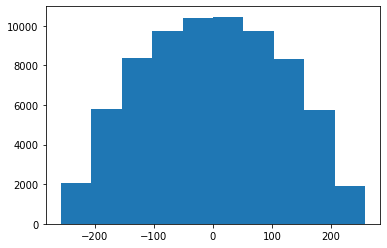

In [11]:
feature_vals = np.copy(tX[:,f_in["PRI_jet_subleading_eta"]])
feature_vals[feature_vals == -999.] = np.NaN

#feature_vals[feature_vals > 0] = np.NaN
plt.hist(np.rad2deg(feature_vals))
#feature_vals

#### Correlation of features

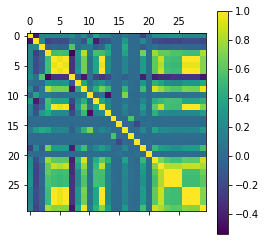

In [12]:
corr_mat = np.corrcoef(tX,rowvar=False)
plt.matshow(corr_mat)
plt.colorbar()
plt.show()

Some variables appear to be more correlated with each other than others

#### Normalize data

In [13]:
def standardize(tx):
    """
    Standardizes the data by substracting mean and dividing by standard deviation
    """
    tx -= np.mean(tx,axis=0)
    tx /= np.std(tx,axis=0)
    
    return tx

In [14]:
tX_standardized = standardize(tX)

#### Do principal component analysis

In [15]:
cov_mat = np.cov(tX_standardized.T) #calculate covariance matrix
eigval_pca, eigvec_pca = np.linalg.eig(cov_mat) #can not be orderd, but they are here

In [16]:
np.sum(percentages)

23.217131999999996

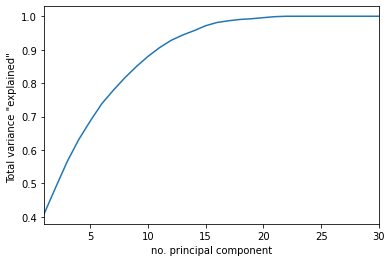

In [17]:
total_eigval = np.sum(eigval_pca)
percentages = [eigval/total_eigval for eigval in eigval_pca]
percentages_cumulative = np.cumsum(percentages)
plt.plot(np.arange(1,len(eigval_pca)+1),percentages_cumulative)
plt.xlim(1,len(eigval_pca))
plt.ylabel("Total variance \"explained\" ")
plt.xlabel("no. principal component")
plt.show()

Arbitrarily choose cutoff when more than 0.95% of the cumulative variance is explained

In [18]:
greater_095 = np.argmax(percentages_cumulative > 0.95) #stops at first true
print("{} principal components can explain more than 95% of the variance".format(greater_095+1))

14 principal components can explain more than 95% of the variance


#### Project onto principal components

  v : (..., M, M) array 
  The normalized (unit "length") eigenvectors, 
  such that the 
        column ``v[:,i]`` is the eigenvector corresponding to the 
        eigenvalue ``w[i]``.

In [19]:
pcas_095 = eigvec_pca[:,:greater_095]
pcas_095_other = (eigvec_pca.T[:][:greater_095]).T
np.allclose(pcas_095_other, pcas_095)

True

In [20]:
pcas_095.shape

(30, 13)

In [21]:
projection_mat = eigvec_pca[:,:greater_095]
projected_data = tX_standardized @  projection_mat

In [22]:
projected_data.shape

(250000, 13)

### Ideas for feature engineering

Missing values\
binary features -1 (negatives), 0 (not there), 1 (positives)\
numericals: replace by some value\


## Make a first prediction 

In [3]:
# load -> clean -> features -> fit/validate -> predict -> submit
from linear_model_base import RidgeRegression

In [6]:
from data_cleaner import Data_Cleaner

In [7]:
def autofeature_detector(max_degree,lambda_):
    #init feature
    data_cleaner = Data_Cleaner("../data/train.csv")
    data_cleaner.replace_with_mean()
    tX_orig = np.copy(data_cleaner.tX)
    results_tr = np.zeros((tX_orig.shape[1],max_degree))
    results_te = np.zeros((tX_orig.shape[1],max_degree))
    
    for feature_index in range(tX_orig.shape[1]):
        data_cleaner.tX = np.delete(data_cleaner.tX, feature_index, axis=1)
        for degree in range(max_degree):
            data_cleaner.tX = np.concatenate([data_cleaner.tX, np.power(tX_orig[:,feature_index], degree+1)[:,np.newaxis]],axis=1) 
            data_cleaner.normalize()
            model = RidgeRegression(data_cleaner)
            results_tr[feature_index,degree], results_te[feature_index,degree] =  model.cross_validation(5,lambda_=0.1)                     
        data_cleaner.tX = tX_orig
        print("feature {} done".format(feature_index))
    return results_tr, results_te

In [24]:
feature_index = 2
degree = 1
np.concatenate([tX, np.power(tX[:,feature_index], degree+1)[:,np.newaxis]],axis=1).shape   

(250000, 31)

In [25]:
np.power(tX[:,feature_index], degree+1).shape

(250000,)

In [8]:
results_tr, results_te = autofeature_detector(20,1e-03)

feature 0 done
feature 1 done
feature 2 done
feature 3 done
feature 4 done
feature 5 done
feature 6 done
feature 7 done
feature 8 done
feature 9 done
feature 10 done
feature 11 done
feature 12 done
feature 13 done
feature 14 done
feature 15 done
feature 16 done
feature 17 done
feature 18 done
feature 19 done
feature 20 done
feature 21 done
feature 22 done
feature 23 done
feature 24 done
feature 25 done
feature 26 done
feature 27 done
feature 28 done
feature 29 done


In [10]:
#np.save("max_poly_test",results_te,allow_pickle=False)

In [ ]:
results_tr[20]

In [ ]:
results_tr_working = 

In [11]:
np.sum(np.argmin(np.around(results_te,decimals=4), axis=1))

136

In [75]:
np.argmin(np.around(results_te,decimals=3), axis=1)

array([ 4,  2,  0,  0, 15,  6,  5, 10,  0,  3,  4,  8,  1,  5,  1,  0,  0,
        1,  0,  0,  0,  6,  1,  2,  3,  0,  0,  1,  9,  4])

In [14]:
np.argmin(np.around(results_te,decimals=3), axis=1)

array([ 0,  5,  3,  0,  0,  3,  0, 10,  0,  1,  0,  1,  0,  4,  1,  0,  0,
        1,  0,  0,  0,  5,  2,  0,  0,  0,  0,  0,  0,  4])

In [79]:
results_te = np.load("polynomial_expansion_rmses_train.npy")

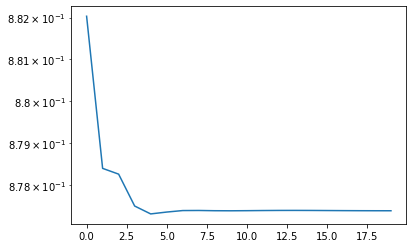

In [80]:
plt.plot(np.arange(20),results_te[7])
plt.yscale("log")

In [36]:
results_te[4]

array([nan, nan, nan])

In [4]:
tX.shape

(250000, 30)

In [5]:
tA = np.delete(tX, 1, axis=1)

In [8]:
tA.shape

(250000, 29)

In [3]:
from ridge_regression_matthias import ridge_regression

In [35]:
cleaner_data.tX

array([[ 0.46141372, -0.4134511 ,  0.42058145, ..., -0.01288788,
        -0.00926338, -0.00736914],
       [ 0.51670419, -0.38504333,  0.42913442, ..., -0.01288796,
        -0.00926339, -0.00736914],
       [-2.33785898,  2.34570834, -2.35236556, ..., -0.01288795,
        -0.00926339, -0.00736914],
       ...,
       [ 0.38016991, -0.44936671,  0.4112585 , ..., -0.01288795,
        -0.00926339, -0.00736914],
       [ 0.35431502, -0.4593419 ,  0.40900473, ..., -0.01288516,
        -0.00926353, -0.00736914],
       [-2.33785898,  2.34570834, -2.35236556, ..., -0.01288516,
        -0.00926353, -0.00736914]])

In [4]:
cleaner_data = Data_Cleaner("../data/train.csv")

In [53]:
results_te = np.load("polynomial_expansion_rmses_train.npy")

In [53]:
np.argmin(np.around(results_te,decimals=4), axis=1)

array([18, 11, 19, 19,  7,  7,  5,  4, 19, 17,  8, 14,  5, 19,  3,  0, 17,
        3,  0, 18,  0, 11,  3, 19,  3,  0,  0,  5,  5,  8])

In [49]:
from build_polynomial import build_poly

In [51]:
build_poly(np.arange(10),degree=5).shape

(10, 5)

In [27]:
cleaner_data.build_polynomials_from_degree_array(np.argmin(np.around(results_te,decimals=4), axis=1))

In [28]:
cleaner_data.normalize()

In [30]:
np.mean(cleaner_data.tX,axis=0)

array([ 8.15632006e-16,  4.65149911e-13,  3.78568382e-13,  3.03840748e-13,
       -1.43695082e-14, -1.91085496e-13,  3.64259241e-13, -3.00065810e-13,
       -2.88976734e-13, -6.69064804e-18, -4.26495794e-15,  4.83962870e-17,
        3.54626981e-16, -1.39567663e-16, -9.82658399e-18, -2.73827239e-15,
       -1.39044179e-15,  2.72766580e-16,  4.74777301e-17,  3.03259563e-16,
       -7.81498713e-16,  6.74149219e-16, -3.68012287e-17, -1.04636882e-15,
        2.30161223e-15, -2.32189848e-12,  1.29211494e-12,  2.48162202e-15,
        1.72779281e-12,  1.30034907e-13,  1.76017925e-13,  1.07186473e-13,
       -1.49829278e-13,  1.13576205e-13,  5.55661716e-14, -2.75246804e-14,
       -3.37083611e-14,  3.33570647e-14,  3.74677855e-15,  6.22483587e-15,
        1.85108647e-14, -4.04914324e-15,  2.50095273e-12,  2.37338582e-12,
        6.54537629e-13, -5.43307135e-13, -1.37485910e-12, -3.07012662e-13,
       -5.40663650e-13, -2.50674166e-12,  3.05671088e-15,  2.99116052e-14,
        1.74834286e-16, -

In [31]:
cleaner_data.tX.shape

(250000, 132)

In [36]:
rmse_tr, rmse_te = cross_validation_prediction(cleaner_data.y,cleaner_data.tX)

lambda: 0.0001 done


KeyboardInterrupt: 

In [5]:
from least_squares_matthias import least_squares

In [6]:
mse, w = least_squares(cleaner_data.y, cleaner_data.tX)

In [39]:
np.sqrt(2*mse)

0.8210050727748331

In [36]:
#mse, w = ridge_regression(cleaner_data.y,cleaner_data.tX,0.0007880462815669921)

In [199]:
cleaner_data.tX.shape

(250000, 13)

In [37]:
np.argmin(rmse_tr)

0

In [111]:
np.logspace(-10, 0normalize)[np.argmin(rmse_te)]

0.04175318936560409

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from plots import cross_validation_visualization

In [29]:
np.argmin(rmse_te)

20

In [31]:
np.logspace(-10, 0, 30)[np.argmin(rmse_te)]

0.0007880462815669921

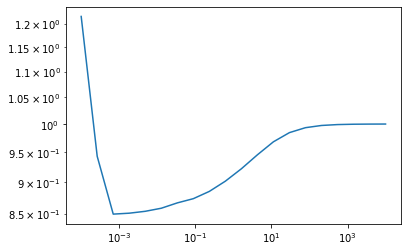

In [43]:
plt.loglog(np.logspace(-4, 4, 20), rmse_te)
#plt.xscale("log")


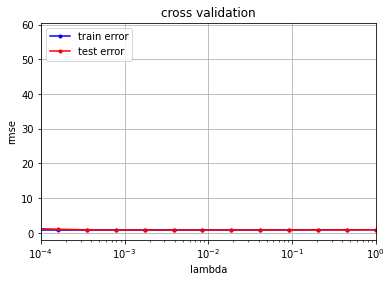

In [26]:
cross_validation_visualization(np.logspace(-10, 0, 30), rmse_tr, rmse_te)

## Generate predictions and save ouput in csv format for submission:

In [193]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [7]:
cleaner_data_test = Data_Cleaner("../data/test.csv")
#cleaner_data_test.build_polynomials_from_degree_array(np.argmin(np.around(results_te,decimals=4), axis=1))


In [47]:
cleaner_data_test.tX.shape

(568238, 132)

In [45]:
cleaner_data_test.normalize()

In [8]:
weights = w

In [9]:
#OUTPUT_PATH = '../scripts/submission_cleaned_polynomial_features_selected_least_squares.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, cleaner_data_test.tX)
#create_csv_submission(cleaner_data_test.ids, y_pred, OUTPUT_PATH)

In [195]:
OUTPUT_PATH = '../scripts/submission_cleaned.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [10]:
y_pred

array([-1., -1., -1., ..., -1.,  1., -1.])

In [16]:
def estimate_Leaderboard_score(y_true,weights,data):
    """Helper function estimating the categorical accuracy on the leaderscore
    """
    y_pred = predict_labels(weights, data)
    N_tot = y_pred.shape[0]
    N_true = len(np.where(y_pred == y_true)[0])
    categorical_acuracy = N_true/N_tot
    return categorical_acuracy

In [24]:
y_true = np.random.choice([1.,1.],size=y_pred.shape[0])

In [25]:
y_true

array([1., 1., 1., ..., 1., 1., 1.])

In [26]:
estimate_Leaderboard_score(y_true,weights,cleaner_data_test.tX)

0.2512415572348206